In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline
import seaborn as sns


In [2]:
data=pd.read_csv('C:\\Users\\DELL\\Desktop\\Practice\\data\\house_prices.csv')

In [3]:
data.head(3)

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,yes,East
1,2,114200,2030,4,2,3,yes,East
2,3,114800,1740,3,2,1,yes,East


In [8]:
data.isnull().sum()

Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64

In [4]:
data.drop(['Home'], axis=1, inplace=True)

In [5]:
data.columns

Index(['Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')

In [6]:
corr=data.corr()
print(corr)

              Price      SqFt  Bedrooms  Bathrooms    Offers
Price      1.000000  0.552982  0.525926   0.523258 -0.313636
SqFt       0.552982  1.000000  0.483807   0.522745  0.336923
Bedrooms   0.525926  0.483807  1.000000   0.414556  0.114271
Bathrooms  0.523258  0.522745  0.414556   1.000000  0.143793
Offers    -0.313636  0.336923  0.114271   0.143793  1.000000


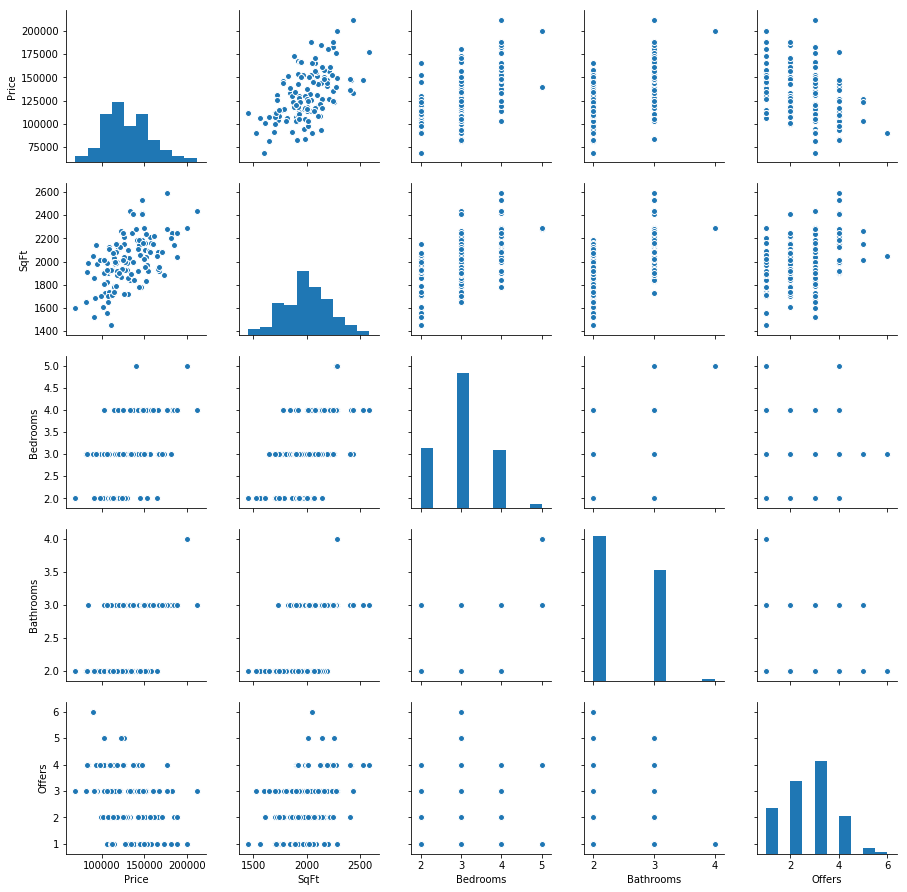

In [7]:
sns.pairplot(data)

In [10]:
dummiesB=pd.get_dummies(data.Brick)
dummiesN=pd.get_dummies(data.Neighborhood)

In [12]:
dfn=pd.concat([data,dummiesB,dummiesN], axis='columns')

In [13]:
dfn.head(3)

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood,no,yes,East,North,West
0,114300,1790,2,2,2,yes,East,0,1,1,0,0
1,114200,2030,4,2,3,yes,East,0,1,1,0,0
2,114800,1740,3,2,1,yes,East,0,1,1,0,0


In [14]:
dfn.drop(['Brick','Neighborhood'],axis=1,inplace=True)

In [15]:
dfn.columns

Index(['Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'no', 'yes', 'East',
       'North', 'West'],
      dtype='object')

In [16]:
dummiesBd=pd.get_dummies(data.Bedrooms)
dummiesBth=pd.get_dummies(data.Bathrooms)
dummiesOff=pd.get_dummies(data.Offers)

In [20]:
merged=pd.concat([dfn,dummiesBd,dummiesBth,dummiesOff], axis='columns')

In [21]:
merged.head(3)

,Price,SqFt,Bedrooms,Bathrooms,Offers,no,yes,East,North,West,...,5,2,3,4,1,2,3,4,5,6
0,114300,1790,2,2,2,0,1,1,0,0,...,0,1,0,0,0,1,0,0,0,0
1,114200,2030,4,2,3,0,1,1,0,0,...,0,1,0,0,0,0,1,0,0,0
2,114800,1740,3,2,1,0,1,1,0,0,...,0,1,0,0,1,0,0,0,0,0


In [19]:
object_columns= data.select_dtypes(include=['object'])
print(object_columns.iloc[0])

Brick            yes
Neighborhood    East
Name: 0, dtype: object


In [22]:
merged.drop(['Bedrooms','Bathrooms','Offers'],axis=1,inplace=True)

In [23]:
merged.head(3)

,Price,SqFt,no,yes,East,North,West,2,3,4,5,2,3,4,1,2,3,4,5,6
0,114300,1790,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
1,114200,2030,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
2,114800,1740,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0


In [25]:
merged.rename({'yes': 'Bricks', 'no': 'No_bricks'}, axis=1, inplace=True)


In [27]:
merged.to_csv('C:\\Users\\DELL\\Desktop\\Practice\\data\\house_prices_preprocessed.csv',index=False)